## Installing necessary libraries

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

## Importing libraries

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from collections import Counter
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.util import ngrams
import re


## Downloading dependencies

In [6]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("punkt_tab")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Loading dataset

In [7]:
dataset=load_dataset("ErfanMoosaviMonazzah/fake-news-detection-dataset-English")
train_data=dataset["train"]
df=pd.DataFrame(train_data)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/487 [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/78.4M [00:00<?, ?B/s]

validation.tsv:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8267 [00:00<?, ? examples/s]

## Viewing data

In [8]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0


In [9]:
df.shape

(30000, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   title       30000 non-null  object
 2   text        30000 non-null  object
 3   subject     30000 non-null  object
 4   date        30000 non-null  object
 5   label       30000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


## Checking missing values

In [11]:
print("Missing Values: \n",df.isnull().sum() )

Missing Values: 
 Unnamed: 0    0
title         0
text          0
subject       0
date          0
label         0
dtype: int64


## Checking duplicates

In [12]:
print("Duplicates: \n",df.duplicated())

Duplicates: 
 0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool


# **Data Visualization**

##  Subject Distribution

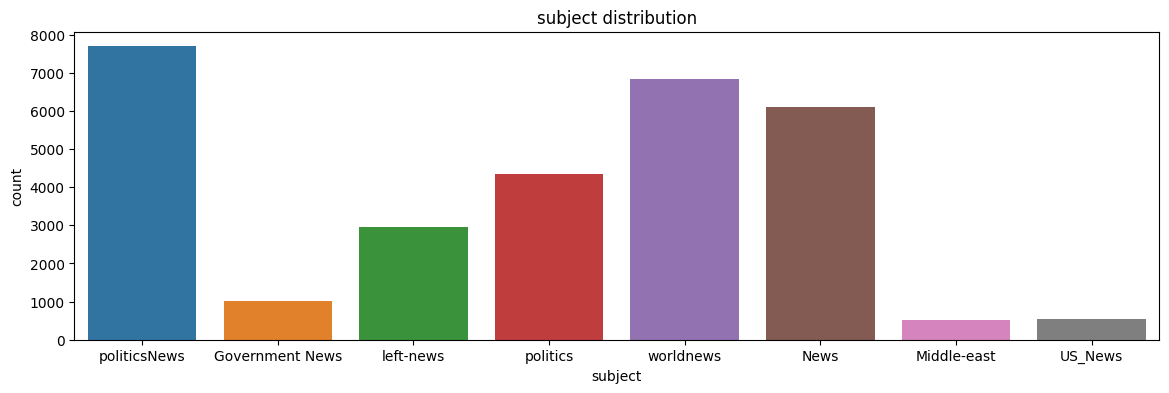

In [13]:
plt.figure(figsize=(14,4))
sns.countplot(data=df, x="subject", hue="subject")
plt.title("subject distribution")
plt.xlabel("subject")
plt.ylabel("count")
plt.show()

## Class distribution

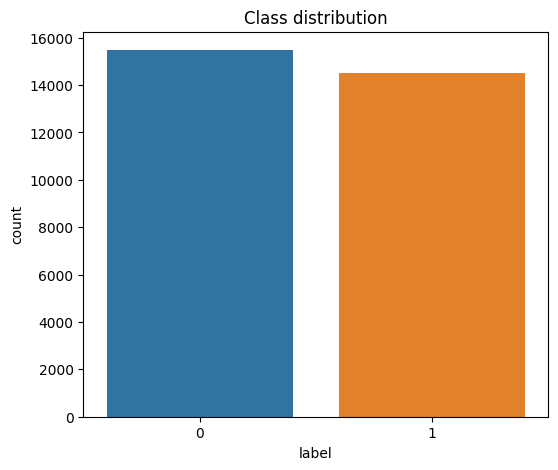

In [14]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="label", hue="label", legend=False)
plt.title("Class distribution")
plt.xlabel('label')
plt.ylabel("count")
plt.show()

## Data Cleaning

In [15]:
def data_cleaning(text):
    stop_words=set(stopwords.words("english"))
    stemmer=PorterStemmer()
    lemmatizer=WordNetLemmatizer()
    text=str(text)

    text=re.sub("^a-zA-Z"," ",text)
    text=re.sub(("^\s+|\s+|$"), " ",text)
    text=re.sub("@[\w\d]+", " ", text)
    text=re.sub("http:[\w\:\/\.]+", " ",text)

    text = text.lower()
    tokens = word_tokenize(text)

    tokens = [token for token in tokens if len(token) > 1]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    cleaned_text = " ".join(tokens)
    return cleaned_text

df["cleaned_text"]=df["text"].apply(data_cleaning)
df.head()


,Unnamed: 0,title,text,subject,date,label,cleaned_text
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1,former cia director john brennan friday critic...
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0,man come store information much fraudster exce...
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1,president donald trump thursday tapped federal...
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0,hillary clinton ally david brock offering pay ...
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0,pleading ignorance perfect ploy nancy pelosi b...


# **Cleaned Text vs Original Text**

## Most Frequent words

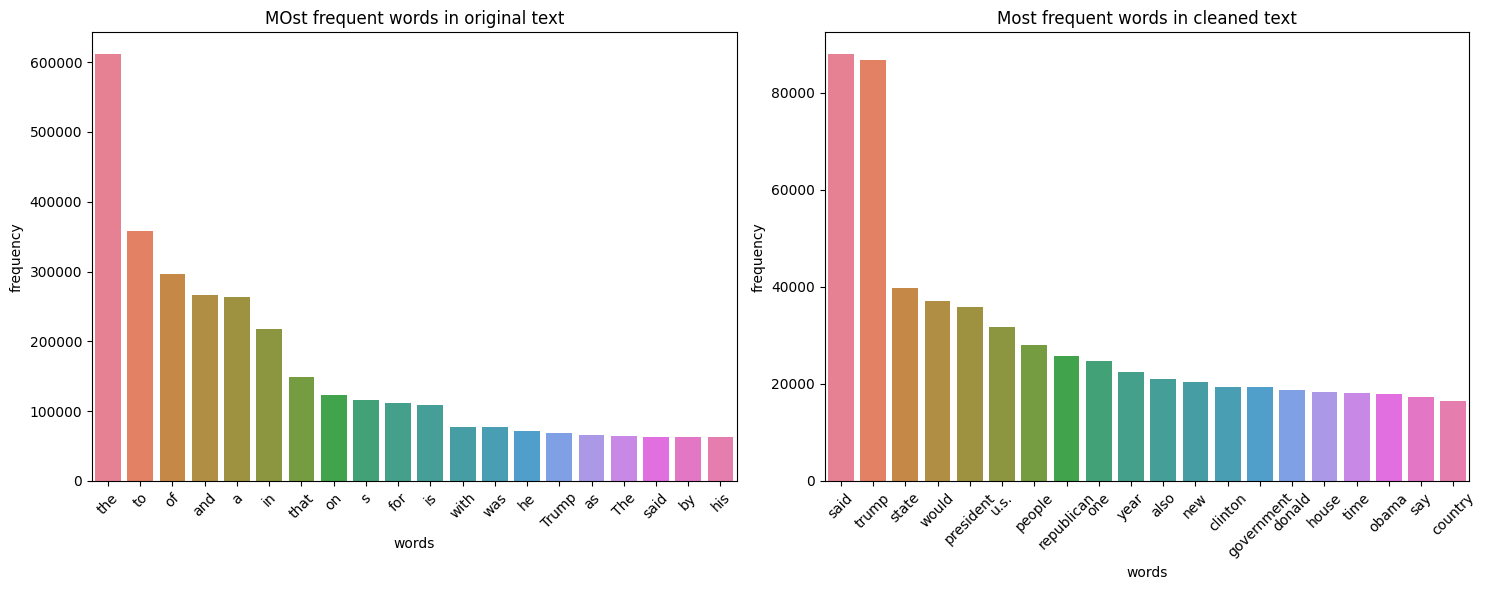

In [16]:
original_text = " ".join(df["text"]).split()
cleaned_text = " ".join(df["cleaned_text"]).split()

word_freq_text= Counter(original_text)
word_freq_cleaned = Counter(cleaned_text)

common_words_text = word_freq_text.most_common(20)
common_words_cleaned = word_freq_cleaned.most_common(20)

common_df_text=pd.DataFrame(common_words_text, columns=["words", "frequency"])
common_df_cleaned=pd.DataFrame(common_words_cleaned, columns=["words", "frequency"])

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x="words", y="frequency", data=common_df_text, hue="words", legend=False)
plt.xticks(rotation=45)
plt.title("MOst frequent words in original text")

plt.subplot(1,2,2)
sns.barplot(x="words", y="frequency", data = common_df_cleaned, hue="words", legend=False)
plt.xticks(rotation=45)
plt.title("Most frequent words in cleaned text")

plt.tight_layout()
plt.show()

## Word Cloud

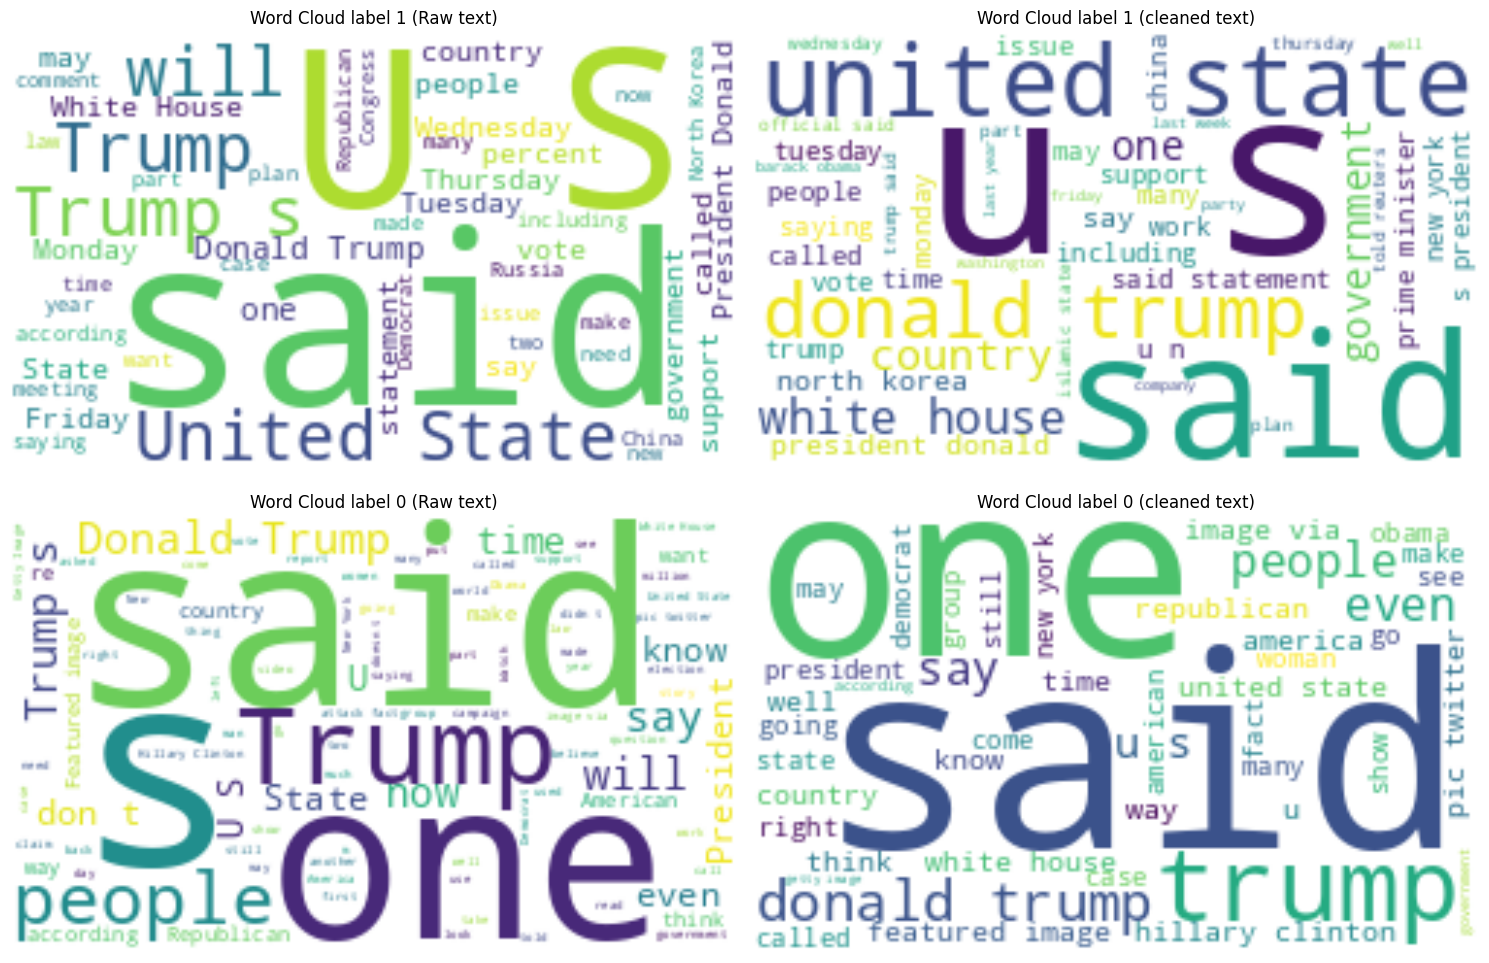

In [17]:
unique_labels=df["label"].unique()
n_labels=len(unique_labels)

plt.figure(figsize=(15,5*n_labels))

for i,label in enumerate(unique_labels):
  plt.subplot(n_labels,2,i*2+1)
  word_text=" ".join(df[df["label"]==label]["text"])
  wordcloud_text=WordCloud(width=250, height=150, background_color="white").generate(word_text)
  plt.imshow(wordcloud_text, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"Word Cloud label {label} (Raw text)")


  plt.subplot(n_labels,2, i*2+2)
  cleaned_text= " ".join(df[df["label"]== label]["cleaned_text"])
  wordcloud_cleaned=WordCloud(width=250, height=150, background_color="white").generate(cleaned_text)
  plt.imshow(wordcloud_cleaned, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"Word Cloud label {label} (cleaned text)")

plt.tight_layout()
plt.show()

## Length distribution

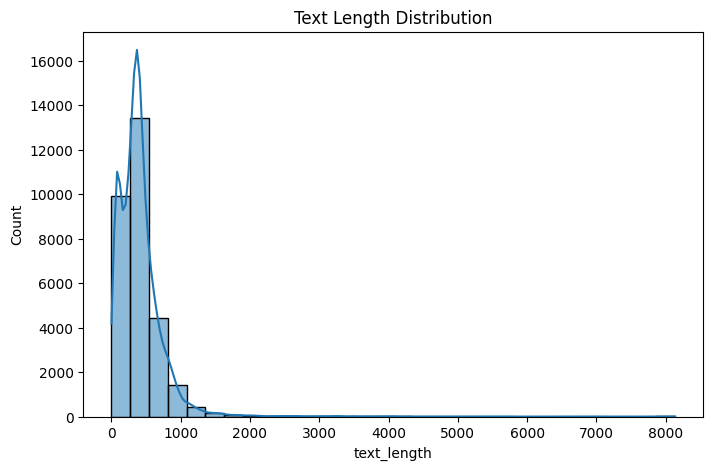

In [23]:
# Check text length distribution
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.show()

#**Fake News vs Real News**

## Word Cloud


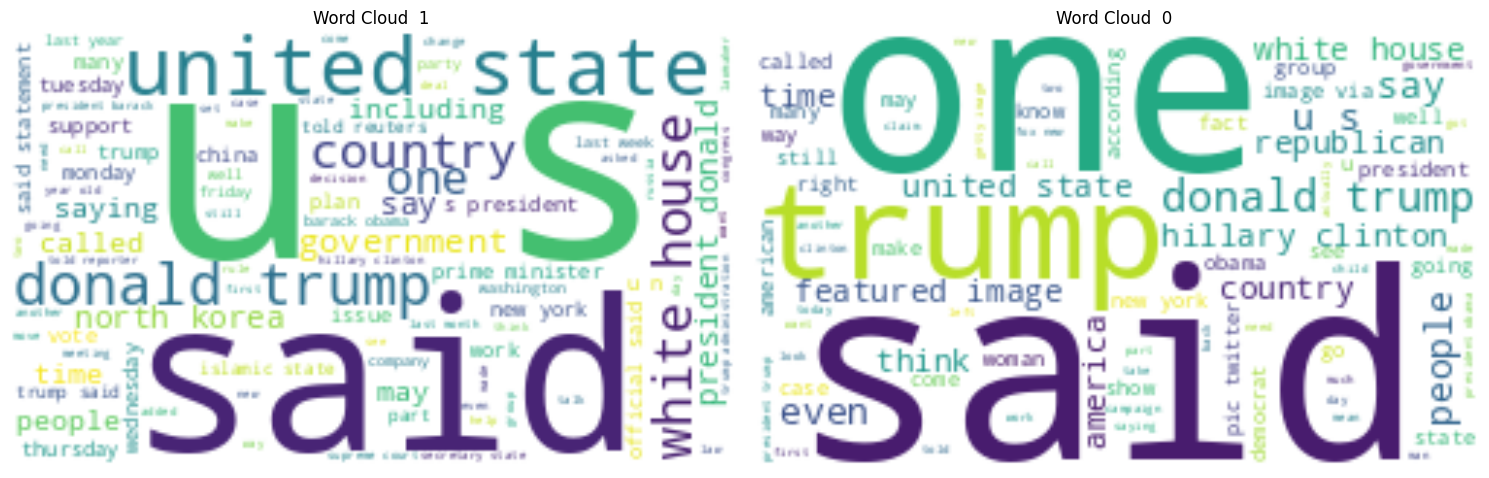

In [24]:
unique_labels=df["label"].unique()
n_labels=len(unique_labels)

plt.figure(figsize=(15,5))

for i,label in enumerate(unique_labels):
  plt.subplot(1,n_labels,i+1)
  word_text=" ".join(df[df["label"]==label]["cleaned_text"])
  wordcloud_text=WordCloud(width=250, height=150, background_color="white").generate(word_text)
  plt.imshow(wordcloud_text, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"Word Cloud  {label} ")

plt.tight_layout()
plt.show()

## Text Length Distribution

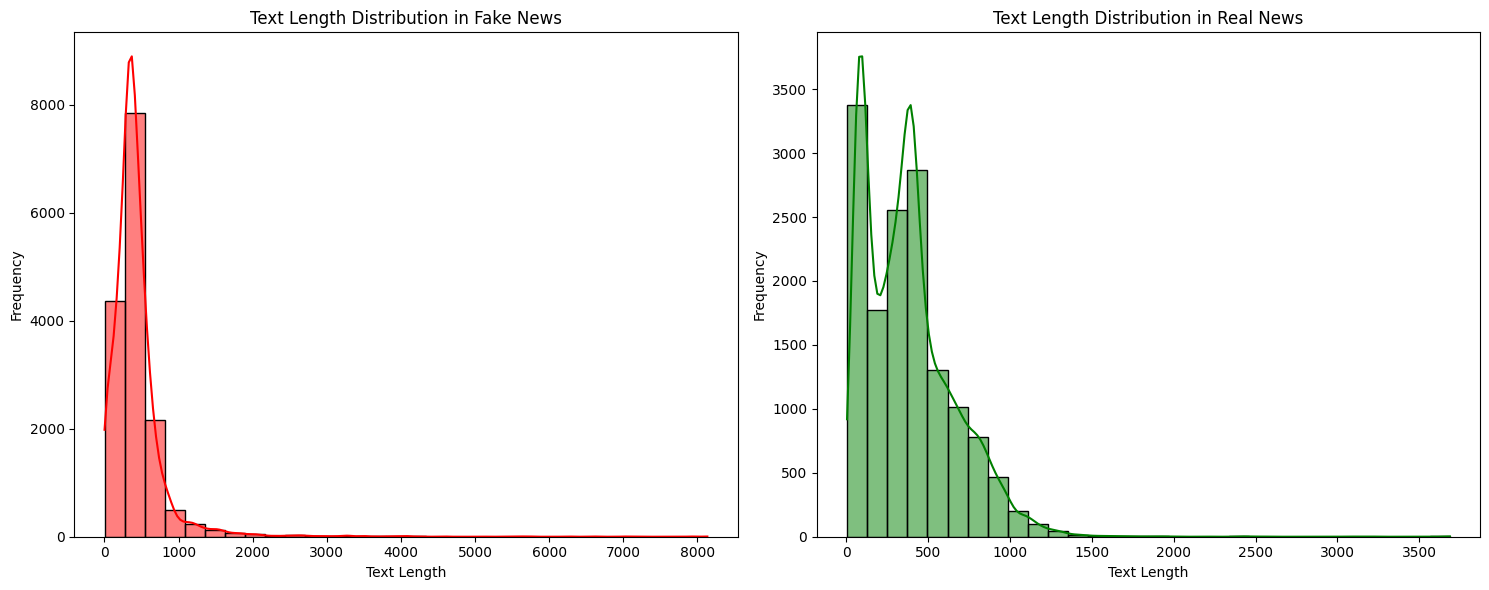

In [25]:
# Add text length column
df["text_length"] = df["text"].apply(lambda x: len(x.split()))

# Filter data
fake_news = df[df["label"] == 0]["text_length"]
real_news = df[df["label"] == 1]["text_length"]

# Plot
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(fake_news, bins=30, kde=True, color='red')
plt.title("Text Length Distribution in Fake News")
plt.xlabel("Text Length")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.histplot(real_news, bins=30, kde=True, color='green')
plt.title("Text Length Distribution in Real News")
plt.xlabel("Text Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## Most frequent words

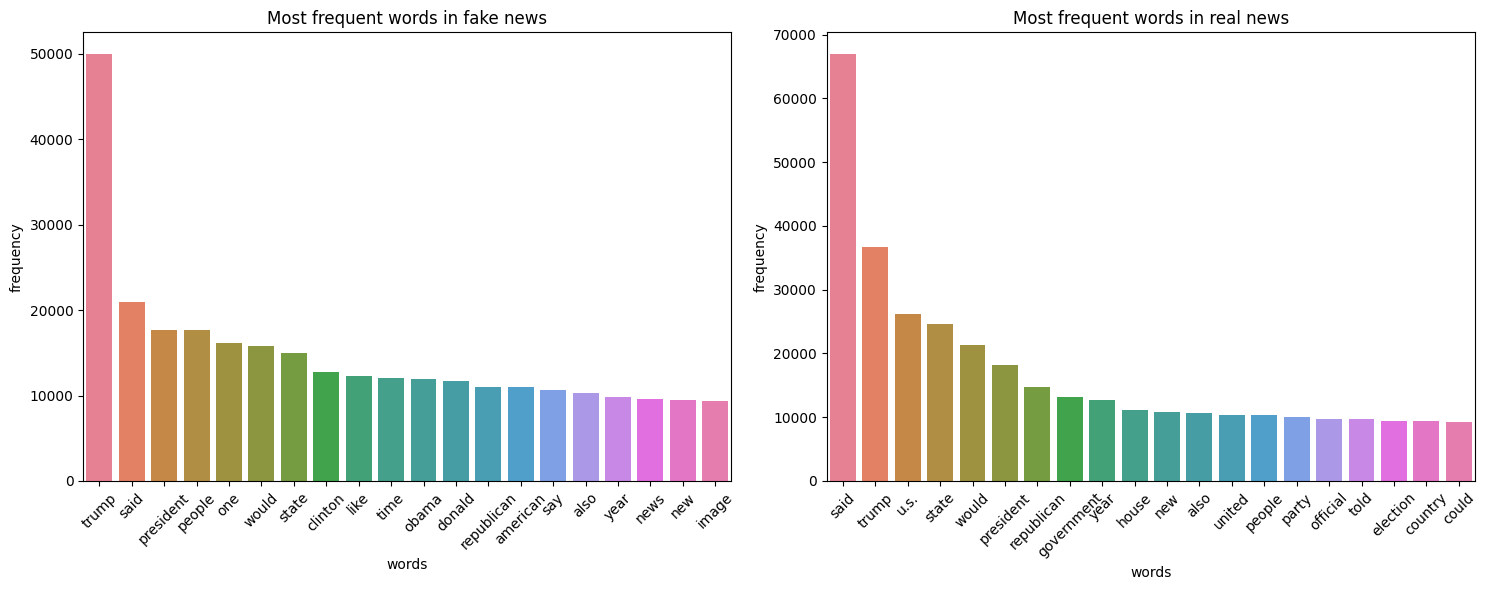

In [26]:
fake_news = " ".join(df[df["label"] == 0]["cleaned_text"]).split()
real_news = " ".join(df[df["label"] == 1]["cleaned_text"]).split()

word_freq_text= Counter(fake_news)
word_freq_cleaned = Counter(real_news)

common_words_text = word_freq_text.most_common(20)
common_words_cleaned = word_freq_cleaned.most_common(20)

common_df_text=pd.DataFrame(common_words_text, columns=["words", "frequency"])
common_df_cleaned=pd.DataFrame(common_words_cleaned, columns=["words", "frequency"])

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x="words", y="frequency", data=common_df_text, hue="words", legend=False)
plt.xticks(rotation=45)
plt.title("Most frequent words in fake news")

plt.subplot(1,2,2)
sns.barplot(x="words", y="frequency", data = common_df_cleaned, hue="words", legend=False)
plt.xticks(rotation=45)
plt.title("Most frequent words in real news")

plt.tight_layout()
plt.show()

# **Data Preprocessing**

## Converting into vectors

In [27]:
tfidf_Vectorizer=TfidfVectorizer(max_features=5000)
X_tfidf= tfidf_Vectorizer.fit_transform(df["cleaned_text"])

X_tfidf_df=pd.DataFrame(X_tfidf.toarray() , columns=tfidf_Vectorizer.get_feature_names_out())
print(X_tfidf_df.head())

    00       000   10  100   11   12  120   13   14       15  ...  youtube  \
0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  ...      0.0   
1  0.0  0.030504  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.03804  ...      0.0   
2  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  ...      0.0   
3  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  ...      0.0   
4  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  ...      0.0   

   ypg  zealand  zero  zika  zimbabwe  zinke  zone  zor  zuma  
0  0.0      0.0   0.0   0.0       0.0    0.0   0.0  0.0   0.0  
1  0.0      0.0   0.0   0.0       0.0    0.0   0.0  0.0   0.0  
2  0.0      0.0   0.0   0.0       0.0    0.0   0.0  0.0   0.0  
3  0.0      0.0   0.0   0.0       0.0    0.0   0.0  0.0   0.0  
4  0.0      0.0   0.0   0.0       0.0    0.0   0.0  0.0   0.0  

[5 rows x 5000 columns]


## Data Splitting

In [28]:
x=X_tfidf
y=df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("training data shape",x_train.shape)
print("testing data shape",x_test.shape)

training data shape (24000, 5000)
testing data shape (6000, 5000)


## Model Training

In [29]:

nb_model=MultinomialNB()
nb_model.fit(x_train,y_train)
nb_pred=nb_model.predict(x_test)

lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred=lr_model.predict(x_test)

rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred=rf_model.predict(x_test)


## Model Evaluation

In [30]:
def evaluate_model(model_name,y_test,y_pred):
    print(f"\n🔹 Model: {model_name}")
    print("Accuracy score",accuracy_score(y_test,y_pred))
    print("Classification Report:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print()

evaluate_model("Naive_Bayes",y_test,nb_pred)
evaluate_model("Logistic regression",y_test,lr_pred)
evaluate_model("Random forest",y_test,rf_pred)


🔹 Model: Naive_Bayes
Accuracy score 0.9331666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      3137
           1       0.94      0.92      0.93      2863

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000

Confusion Matrix:
 [[2961  176]
 [ 225 2638]]


🔹 Model: Logistic regression
Accuracy score 0.9828333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3137
           1       0.98      0.99      0.98      2863

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

Confusion Matrix:
 [[3076   61]
 [  42 2821]]


🔹 Model: Random forest
Accuracy score 0.9903333333333333
Classification Report:
   

## Model Testing

In [31]:
def predict_sentiment(text, model):
    cleaned_text = data_cleaning(text)
    print(cleaned_text)
    text_vectorized = tfidf_Vectorizer.transform([cleaned_text])
    prediction = model.predict(text_vectorized)
    return prediction[0]

# Test the model with a sample text
sample_text = "Trump is working hard for US."
print("Predicted Sentiment:", predict_sentiment(sample_text, rf_model))


trump working hard u
Predicted Sentiment: 0


## Saving Model

In [32]:
import pickle
print("Saving the model...")
with open('fakenews_detection_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
print("Model saved successfully!")

Saving the model...
Model saved successfully!


## Saving Data Vectors

In [33]:
import pickle
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_Vectorizer, file)
print("vectorizer saved successfully!")

vectorizer saved successfully!
